# Gen 1 Pokemon Image Classifier!!!
This project is a simple image classifier for all 151 first generation Pokemon. 
The dataset comes from Kaggle: https://www.kaggle.com/datasets/rogerkoala/first-gen-pokemon 

## Cell Breakdown:
1. Imports.
2. Load training and validation datasets.
3. Store category names and number of categories.
4. Display test images to confirm propper import.
5. Run autotune.
6. Define the custom model shape.
7. Fit the model.
8. Show model training history.
9. Test with image of choice. 

## Helpful links:
- Loading and processing: https://www.tensorflow.org/tutorials/load_data/images
- Data augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
- Image testing: https://www.tensorflow.org/tutorials/images/classification 

In [1]:
#imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
#load data for training and testing
train_ds = image_dataset_from_directory(
    '../First-Gen_Pokemon_Image_Classifier/dataset/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
)

val_ds = image_dataset_from_directory(
    '../First-Gen_Pokemon_Image_Classifier/dataset/test',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
)

Found 2249 files belonging to 151 classes.
Using 1800 files for training.
Found 852 files belonging to 151 classes.
Using 170 files for validation.


In [3]:
#store and show class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Class names:", class_names)

Number of classes: 151
Class names: ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetch', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'Mr-Mime', 'Muk',

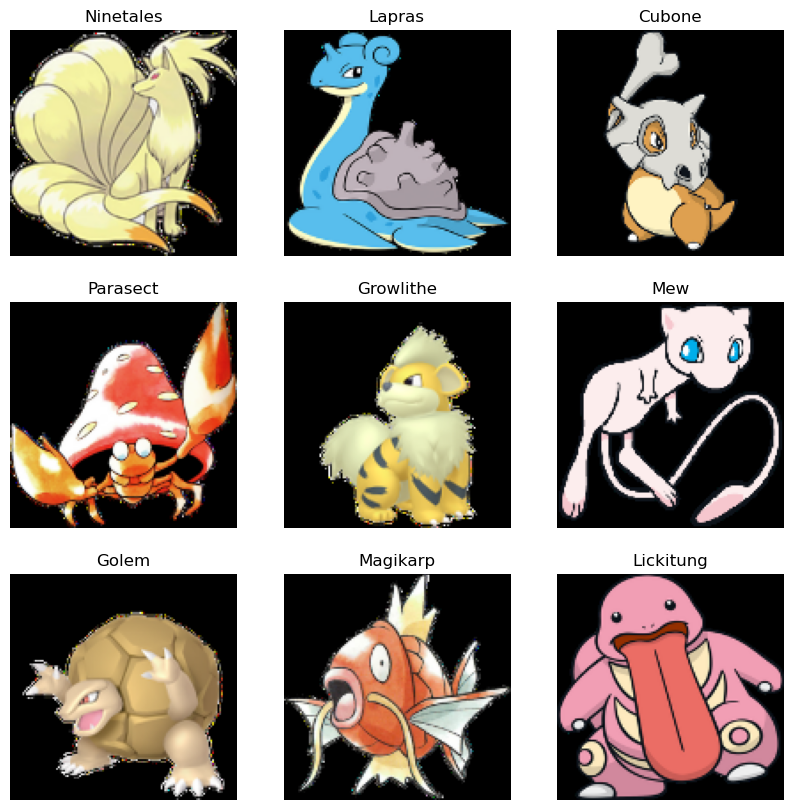

In [4]:
#draw some of the pokemon to ensure that everything loaded right
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Resizing(128, 128),
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.3),
])

<Figure size 1000x1000 with 0 Axes>

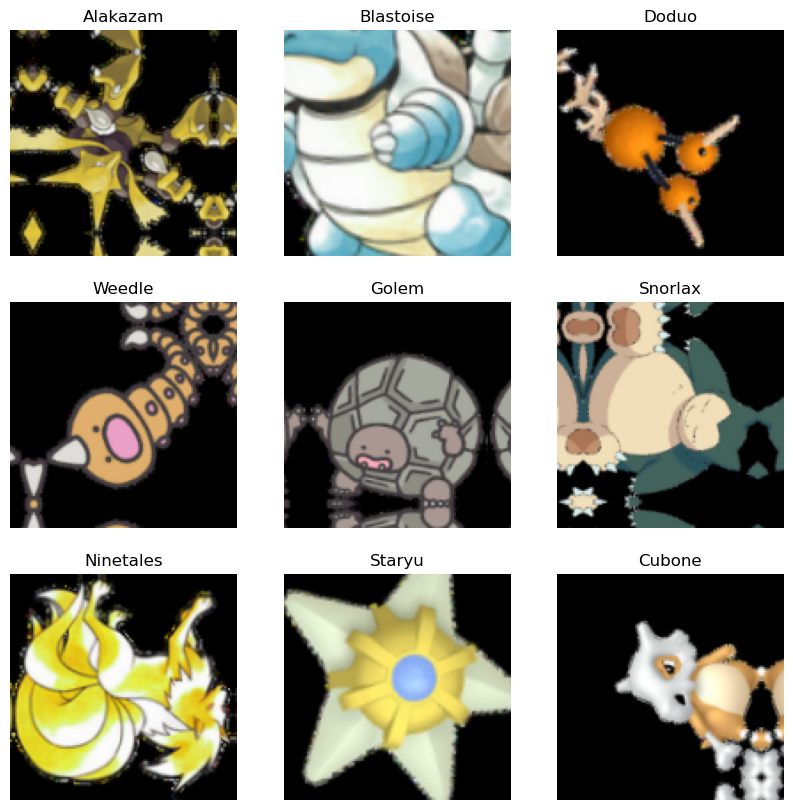

In [34]:
plt.figure(figsize=(10, 10))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data_augmentation(resize_and_rescale(images[i].numpy().astype("uint8"))))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
  layers.Rescaling(1./255),
  layers.Resizing(128, 128),
  #layers.RandomFlip("horizontal_and_vertical"),
  #layers.RandomRotation(0.2),
  #layers.RandomZoom(0.3),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_14 (Rescaling)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_14 (Resizing)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

epochs = 40;
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
)

print("Model finished.")

Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 249ms/step - accuracy: 0.0322 - loss: 4.8872 - val_accuracy: 0.0765 - val_loss: 4.3952
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - accuracy: 0.3228 - loss: 3.1883 - val_accuracy: 0.4824 - val_loss: 2.5827
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 261ms/step - accuracy: 0.7261 - loss: 1.1291 - val_accuracy: 0.5647 - val_loss: 2.1998
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 263ms/step - accuracy: 0.9056 - loss: 0.3766 - val_accuracy: 0.6176 - val_loss: 2.6771
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 263ms/step - accuracy: 0.9578 - loss: 0.1769 - val_accuracy: 0.6412 - val_loss: 2.7157
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 271ms/step - accuracy: 0.9822 - loss: 0.0841 - val_accuracy: 0.6118 - val_loss: 2.8622
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.9883 - loss: 0.0473 - val_accuracy: 0.6765 - val_loss: 3.2171
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step - accuracy: 0.9933 - loss: 0.0310 - val_accu

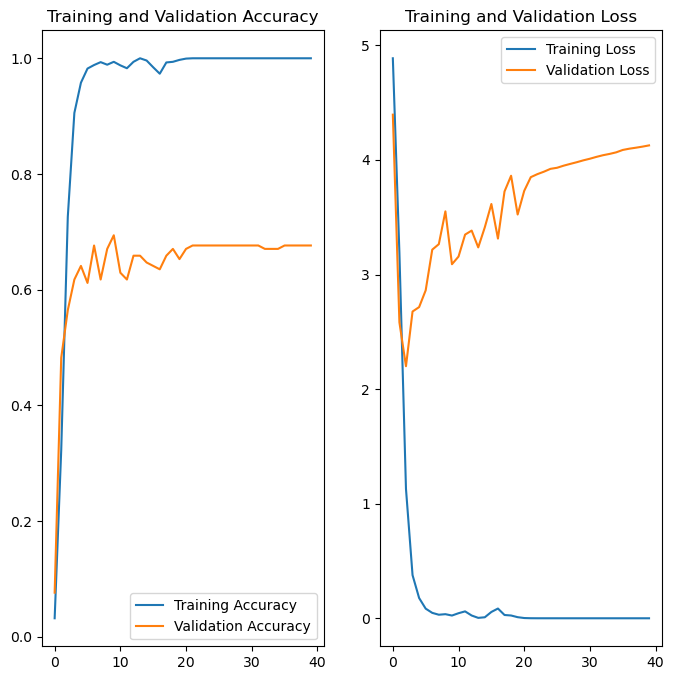

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
test_image = '../First-Gen_Pokemon_Image_Classifier/dataset/test/Dratini/147Dratini_Smile.png'

#get actual Pokemon name
full_directory_path = os.path.dirname(test_image)
folder_name = os.path.basename(full_directory_path)
print(folder_name)

#make a guess of Pokemon name
img = tf.keras.utils.load_img(
    test_image, target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

#share results
print(
    "This image of {} most likely belongs to {} with a {:.2f} percent confidence."
    .format(folder_name, class_names[np.argmax(score)], 100 * np.max(score))
)

Dratini
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This image of Dratini most likely belongs to Charizard with a 96.87 percent confidence.
